# Convert  ".root" data into ".pkl"

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import uproot
import pandas as pd

In [3]:
df_MC = uproot.open('HyperTree_MC_Signal.root')['HyperTree_MC_Signal'].pandas.df()

In [ ]:
df_MC

In [5]:
df_data = uproot.open('HyperTree_Data.root')['HyperTree_Data'].pandas.df()

## Uso i tagli standard

In [6]:
df_data=df_data.astype('float')

In [7]:
hyper_df=df_data.query('NpidClustersHe3>100 and ProngsDCA<0.7 and He3ProngPt>1.8 and 2.991*DistOverP<28 and V0CosPA>0.995')

In [8]:
hyper_df

,V0pt,TPCnSigmaHe3,DistOverP,InvMass,ArmenterosAlpha,V0CosPA,V0Chi2,PiProngPt,He3ProngPt,ProngsDCA,He3ProngPvDCA,PiProngPvDCA,NpidClustersHe3,TPCnSigmaPi,Lrec,Centrality
entry,,,,,,,,,,,,,,,,
4051,2.297202,-2.75,4.267421,2.952389,0.872101,0.998767,0.0,0.146465,2.151225,0.55,0.256,0.114,148.0,-2.50,10.022147,40.150002
4060,9.868563,2.00,8.242251,3.113723,0.973081,0.998100,0.0,0.165010,9.721455,0.11,0.256,0.256,116.0,-1.00,84.233536,1.950000
5327,1.931910,-4.00,4.718936,2.963688,0.862515,0.999522,0.0,0.126183,1.806042,0.53,0.256,0.256,101.0,0.00,9.182902,7.650000
8967,1.962140,1.75,6.648551,3.128157,0.895402,0.995340,0.0,0.282420,1.865032,0.56,0.256,0.256,121.0,-0.75,13.961224,15.450000
12566,2.505391,-4.00,5.755359,3.191828,0.467027,0.997665,0.0,0.691557,1.817575,0.09,0.256,0.256,141.0,-2.25,16.526014,0.250000
18350,3.280194,0.50,3.681108,3.077430,0.808035,0.997765,0.0,0.343583,2.954834,0.40,0.256,0.256,138.0,3.50,12.100310,9.450000
21542,2.201268,0.75,1.439005,3.107208,0.845481,0.995776,0.0,0.228903,1.974739,0.46,0.256,0.256,150.0,0.75,3.254488,6.150000
21543,2.072284,0.75,1.413225,3.000778,0.915323,0.995001,0.0,0.152766,1.974739,0.42,0.256,0.256,150.0,-2.25,3.096290,6.150000
22729,3.480727,2.00,7.068511,3.022056,0.958757,0.999639,0.0,0.126212,3.407385,0.03,0.256,0.256,125.0,-2.25,24.683798,23.750000


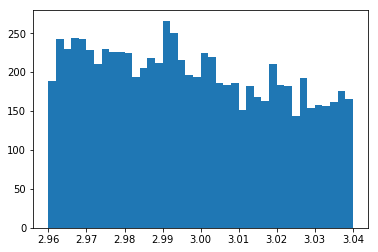

In [9]:
n,bins,_=plt.hist(hyper_df['InvMass'],bins=40,range=[2.96,3.04],histtype='barstacked');

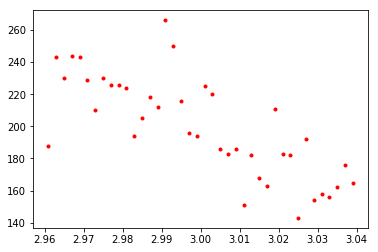

In [10]:
bin_centers = 0.5*(bins[1:]+bins[:-1])
plt.plot(bin_centers,n,'r.')

## Plotto in 10 pT bin

10 < Centralità < 40 come le classi di Stefano per lo yield Vs pT

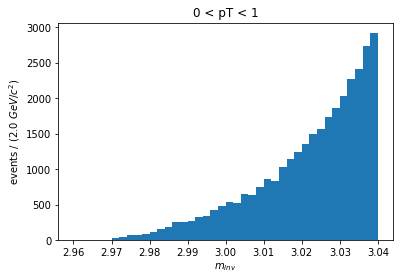

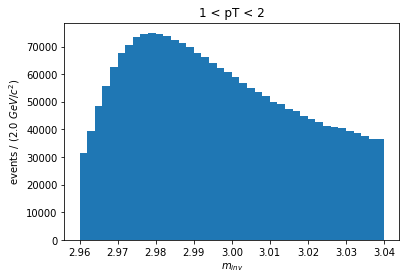

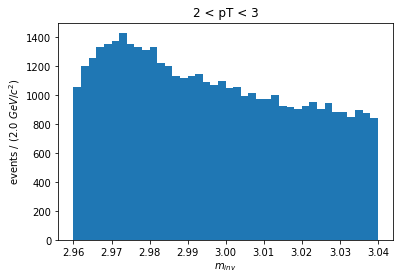

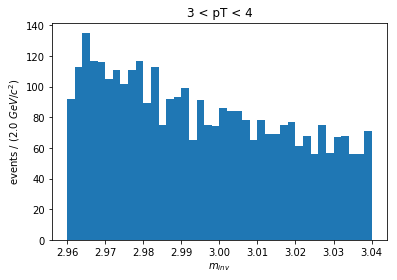

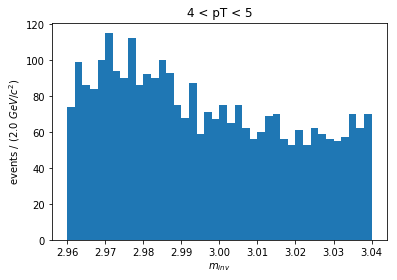

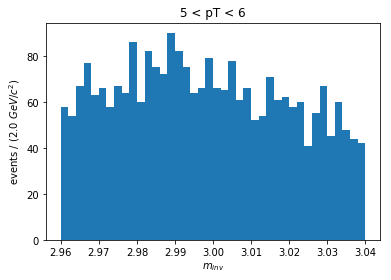

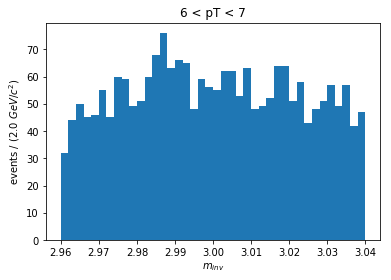

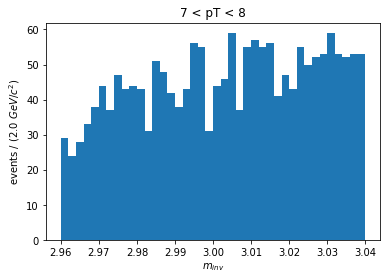

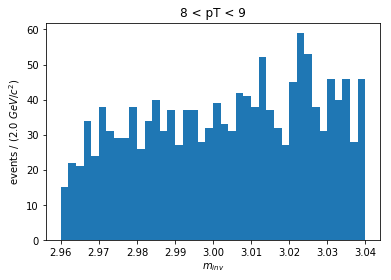

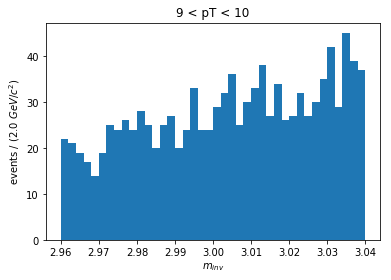

In [11]:
for i in range(10):
    plt.figure();
    hyper_df_pt=df_data.query('V0pt>=@i and V0pt<@i+1 and Centrality>10.0 and Centrality<=40.0 ')
    n,bins,_=plt.hist(hyper_df_pt['InvMass'],bins=40,range=[2.96,3.04],histtype='barstacked')
    title('{} < pT < {}'.format(i,i+1))
    xlabel('$m_{inv}$')
    ylabel('events / $(2.0\ GeV/\it{c}^2)$')

# Creo e salvo pandas per ML

In [ ]:
df_Bkg = df_data.query('InvMass<2.96 or InvMass>3.04 and V0pt<=10')
df_Bkg=df_Bkg[0:10*len(df_MC)]
df_Bkg['y']=0
df_MC['y']=1

In [ ]:
df_ML= pd.concat([df_MC,df_Bkg])
df_ML.to_pickle('df_ML.pkl')

In [ ]:
df_Sig_data=df_data.query('2.96<InvMass<3.04 and V0pt<=10')

In [ ]:
df_Sig_data.to_pickle('df_Sig_data.pkl')